Try to implement this compartment model of calcium in a simplified cardiac cell.

<img src="RyR1.png" width="400"/>

The initial condition for cytoplasmic Calcium is $c(0) = 0.0795$ and for calcium in the Sarcoplasmic reticulum is $cSR(0) = 4.1725$.
Further the fluxes are described by the following ODE system.

\begin{equation}
\begin{split}
\frac{dc}{dt} =& J_{L1} - J_{P1} + J_{L2} - J_{P2} \\
\frac{dc_{SR}}{dt} =& \gamma (-J_{L2} + J_{P2})
\end{split}
\end{equation}

\begin{equation}
\begin{split}
 \color{orange}{J_{L1} = k_1 (c_0 -c)} \quad \quad &\text{calcium entry} \\
 \color{orange}{J_{P1} = k_2c }\quad \quad & \text{calcium extrusion} \\
\color{red}{J_{L2} = k_3 (c_{SR} -c)} \quad \quad & \text{calcium release}\\
\color{red} {J_{P2} = k_4c} \quad\quad & \text{calcium uptake}
\end{split}
\end{equation}

\begin{equation}
\begin{split}
k_3 = \kappa_1 + \frac{\kappa_2c^n}{K_d^n+c^n}\\
 \color{red}{J_{L2} = k_3(c_{SR} - c)} \\
 \color{red}{= (\kappa_1 + \frac{\kappa_2c^n}{K_d^n+c^n})(c_{SR}-c)}
\end{split}
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.integrate

from array import array
from pylab import *
from scipy.integrate.odepack import odeint

from scipy.integrate import odeint
from math import exp, log, sqrt, pi

#constants
k_1 = 2*10**(-5);
k_2 = 0.13;
k_4 = 0.9;
kappa_1 = 0.013;
kappa_2 = 0.58;
K_d = 0.5;
n = 3;
gamma = 4.17;
c0 = 1000;

params = (k_1, k_2, k_4, kappa_1, kappa_2, K_d, n, gamma)


In [5]:
# Implement the right-hand-side of the system

def rhs(y, t, k_1, k_2, k_4, kappa_1, kappa_2, K_d, n, gamma):
    #c, cSR = y

    #input
    c = y[0];
    cSR = y[1];

    #calculation of k_3
    k_3 = kappa_1 + (kappa_2*c**n)/(K_d**n+c**n)
    #calcium entry
    J_L1 = k_1 * (c0 - c)
    #calcium extrusion
    J_P1 = k_2 * c;
    #calcium release
    J_L2  = k_3 *(cSR - c);
    #calcium uptake
    J_P2 = k_4 *c;

    #caculate time dependent functions
    dc_dt =   J_L1-J_P1+J_L2-J_P2
    dcSR_dt = gamma*(-J_L2+J_P2) 
    
    return [dc_dt, dcSR_dt]



In [6]:
# Make a vector of time points where solutions are to be computed
time = np.linspace(0, 1000, 1000)

# Define the initial condition
y_0 = (0.0795, 4.1725)


# Call the ODE solver
solutions = odeint(rhs, y_0, time, params)
c, cSR = np.hsplit(solutions, 2)

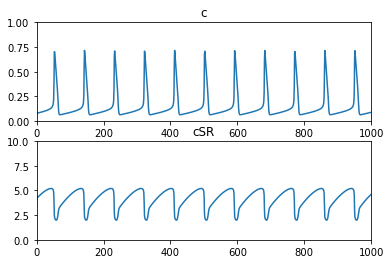

In [7]:
plt.subplot(2,1,1); plt.plot(time,c); plt.title('c')
plt.axis([0, 1000, 0, 1])
plt.subplot(2,1,2); plt.plot(time,cSR); plt.title('cSR')
plt.axis([0, 1000, 0, 10])
plt.show()


What happens when the pump and/or flux constants change? Why?

In [9]:
from CICR import CICR_Widget
CICR_Widget().display()

interactive(children=(FloatSlider(value=4.17, description='gamma', max=10.0, step=0.5), FloatSlider(value=2e-0…

What happens when the Initial Conditions change? Why?

In [10]:
from CICR_IC import CICR_Widget
CICR_Widget().display()

interactive(children=(FloatSlider(value=0.0795, description='y01', max=0.5, step=0.02), FloatSlider(value=4.17…